<a href="https://colab.research.google.com/github/arasirem/Image-recognization/blob/main/Image_nesne_tan%C4%B1ma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [ ]:
#y_train ve y_test cifar10 verisetinde 2 boyutlu bir array. Görsel olarak daha rahat anlamak için tek boyutlu hale getir
#2 boyutlu bir arrayi (bir boyutunda veri var diğer boyutu boş olan tabi) tekboyutlu hale geitrmek için reshape() kullanıyoruz..
y_test = y_test.reshape(-1,)

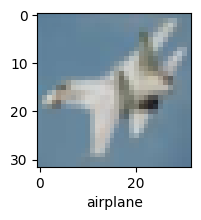

In [ ]:
image_class = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(image_class[y[index]])
    plt.show()
plot_sample(X_test, y_test, 10)


In [ ]:
#Normalization
#Fotoğraflar RGB olarak 3 kanal ve her bir pixel 0-255 arasında değer aldığı için normalization için basitçe her bir pixel değerini 255'e bölmek yeterli..

X_train = X_train / 255.0
X_test = X_test / 255.0

#Deep Learning Algoritmamızı CNN - Convolutional Neural Network Kullanarak Tasarlıyoruz:

deep_learning_model = models.Sequential([
    # 1. bölüm Convolution layer.. Bu kısımda fotoğraflardan tanımlama yapabilmek için özellikleri çıkarıyoruz...
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # 2. bölüm klasik Articial Neural Network olan layerımız.. Yukarıdaki özelliklerimiz ve training bilgilerine göre ANN modelimizi eğiteceğiz..
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
deep_learning_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
deep_learning_model.fit(X_train, y_train, epochs=10)

# Evaluate the model on the test set
test_loss, test_acc = deep_learning_model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/10
1563/1563 [==============================] - 56s 35ms/step - loss: 1.5060 - accuracy: 0.4584
Epoch 2/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.1663 - accuracy: 0.5890
Epoch 3/10
1563/1563 [==============================] - 52s 34ms/step - loss: 1.0250 - accuracy: 0.6413
Epoch 4/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.9414 - accuracy: 0.6707
Epoch 5/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8769 - accuracy: 0.6935
Epoch 6/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8230 - accuracy: 0.7132
Epoch 7/10
1563/1563 [==============================] - 52s 34ms/step - loss: 0.7778 - accuracy: 0.7286
Epoch 8/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7355 - accuracy: 0.7449
Epoch 9/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7042 - accuracy: 0.7533
Epoch 10/10
313/313 [==============================] - 3s 9ms/st

In [ ]:
y_pred = deep_learning_model.predict(X_test)
y_pred[:3]

313/313 [==============================] - 4s 11ms/step


array([[4.97154891e-04, 4.74948647e-05, 1.80744100e-03, 6.78931296e-01,
        2.55894211e-05, 2.33488172e-01, 1.59766674e-02, 1.00162806e-05,
        6.92135990e-02, 2.61919968e-06],
       [7.16042938e-04, 2.15515997e-02, 1.46748960e-07, 6.59881749e-08,
        1.09060956e-08, 2.90732549e-09, 7.17666104e-09, 4.39877734e-09,
        9.64078426e-01, 1.36536155e-02],
       [1.44158930e-01, 3.57460290e-01, 1.16931449e-03, 9.06960457e-04,
        3.39228107e-04, 2.85088681e-05, 1.22996920e-03, 5.71503733e-05,
        4.09046590e-01, 8.56031030e-02]], dtype=float32)

In [ ]:
y_predictions_class = [np.argmax(element) for element in y_pred] #np.argmax ile array şeklinde test ve tahmin sonucunu öğren
y_predictions_class[:5]


[3, 8, 8, 0, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

Real image: 


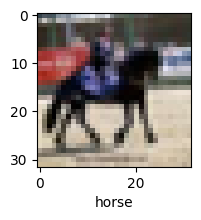

Prediction:  horse


In [ ]:
k=5000
print ("Real image: ")
plot_sample(X_test, y_test, k)

print ("Prediction: " , image_class[y_predictions_class[k]])